In [17]:

import numpy
import pandas
from matplotlib import pyplot as plt
import seaborn
import scipy.signal


In [5]:

def a_weigthing_specs():
    """
    A-weighting frequency filter specifications for sound level meters.
    Original source is IEC61672:2014
    
    Adapted from https://gist.github.com/pral2a/41f7a724c81965b4e36ef3ad97659884
    """
    
    fref = [10, 12.5, 16, 20, 25, 31.5, 40, 50, 63, 80, 100, 125, 160, 200, 250, 315,
        400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000,
      6300, 8000, 10000, 12500, 16000, 20000,
    ]
    Agoal = [-70.4, -63.4, -56.7, -50.5, -44.7, -39.4, -34.6, -30.2, -26.2, -22.5,
      -19.1, -16.1, -13.4, -10.9, -8.6, -6.6, -4.8, -3.2, -1.9, -0.8, 0.0, 0.6,
      1.0, 1.2, 1.3, 1.2, 1.0, 0.5, -0.1, -1.1 -2.5, -4.3, -6.6, -9.3, -9.3,
    ]
    inf = numpy.inf
    
    up1 = [ 3, .25, 2, 2, 2, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.7, 1,
      1, 1, 1, 1, 1, 1.5, 1.5, 1.5, 2, 2, 2.5, 3 ]
    low1 = [ inf, inf, 4, 2, 1.5, 1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.7, 1,
      1, 1, 1, 1, 1, 1.5, 2, 2.5, 3, 5, 8, inf ]
    
    up2 = [ 5, 5, 5, 3, 3, 3, 2, 2, 2, 2, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
      1.5, 1, 1.5, 2, 2, 2.5, 2.5, 3, 3.5, 4.5, 5, 5, 5, 5, 5 ]
    low2 = [ inf, inf, inf, 3, 3, 3, 2, 2, 2, 2, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1, 1.5, 2, 2, 2.5, 2.5, 3, 3.5, 4.5, 5, inf, inf, inf, inf ]
    
    df = pandas.DataFrame({
        'frequency': fref,
        'target': Agoal,
        'class1_upper': up1,
        'class1_lower': -numpy.array(low1),
        'class2_upper': up2,
        'class2_lower': -numpy.array(low2),
    })
    df = df.set_index('frequency')
    return df

specs = a_weigthing_specs()
specs.head()

,target,class1_upper,class1_lower,class2_upper,class2_lower
frequency,,,,,
10.0,-70.4,3.00,-inf,5.0,-inf
12.5,-63.4,0.25,-inf,5.0,-inf
16.0,-56.7,2.00,-4.0,5.0,-inf
20.0,-50.5,2.00,-2.0,3.0,-3.0
25.0,-44.7,2.00,-1.5,3.0,-3.0


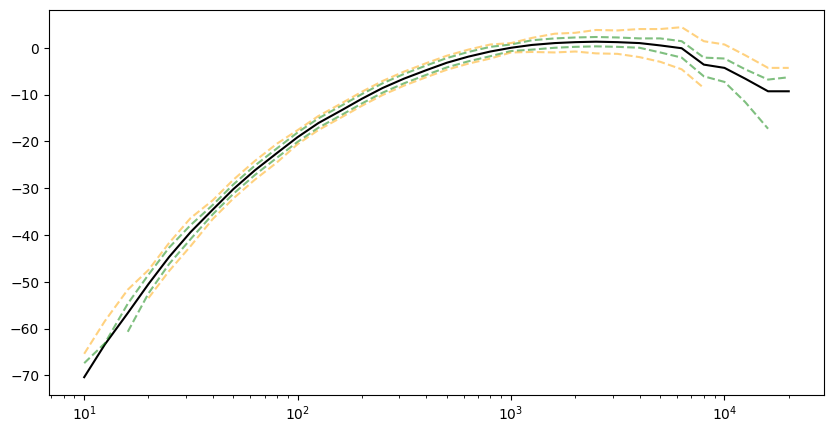

In [6]:
def plot_weighting(ax, specs):

    f = specs.index
    ax.plot(f, specs['target'], label='target', color='black')

    for ref, color in zip(('class1', 'class2'), ('green', 'orange')):
        s = f'{ref}_lower'
        t = specs['target']
        ax.plot(f, t + specs[s], label=s, ls='--', color=color, alpha=0.5)
        s = f'{ref}_upper'
        ax.plot(f, t + specs[s], label=s, ls='--', color=color, alpha=0.5)
    
    ax.set_xscale('log')

fig, ax = plt.subplots(1, figsize=(10, 5))
plot_weighting(ax, specs)

In [48]:
specs

,target,class1_upper,class1_lower,class2_upper,class2_lower
frequency,,,,,
10.0,-70.4,3.00,-inf,5.0,-inf
12.5,-63.4,0.25,-inf,5.0,-inf
16.0,-56.7,2.00,-4.0,5.0,-inf
20.0,-50.5,2.00,-2.0,3.0,-3.0
25.0,-44.7,2.00,-1.5,3.0,-3.0
31.5,-39.4,1.50,-1.5,3.0,-3.0
40.0,-34.6,1.00,-1.0,2.0,-2.0
50.0,-30.2,1.00,-1.0,2.0,-2.0
63.0,-26.2,1.00,-1.0,2.0,-2.0


In [6]:
import PyDynamic


/tmp/ipykernel_13471/4059206376.py:1: DeprecationWarning: This project is archived since May 2024. It will not receive any security related or other patches anymore and we cannot guarantee any form of support in the future.
  import PyDynamic


LSIIR: Least-squares fit of an order 4 digital IIR filter to a frequency response given by 31 values.
LSIIR: Calculation of filter coefficients finished. Final rms error = 0.7669699245264004
4 0.7669699245264004
LSIIR: Least-squares fit of an order 4 digital IIR filter to a frequency response given by 31 values.
LSIIR: Calculation of filter coefficients finished. Final rms error = 0.7410851716170221
4 0.7410851716170221
LSIIR: Least-squares fit of an order 4 digital IIR filter to a frequency response given by 31 values.
LSIIR: Calculation of filter coefficients finished. Final rms error = 0.8439287551166843
4 0.8439287551166843
LSIIR: Least-squares fit of an order 5 digital IIR filter to a frequency response given by 31 values.
LSIIR: Calculation of filter coefficients finished. Final rms error = 0.7523462616326209
4 0.7523462616326209
LSIIR: Least-squares fit of an order 6 digital IIR filter to a frequency response given by 31 values.
LSIIR: Calculation of filter coefficients finished

/tmp/ipykernel_4928/3451699.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, figsize=(10, 5))


LSIIR: Calculation of filter coefficients finished. Final rms error = 0.3223910462350322
7 0.3223910462350322
LSIIR: Least-squares fit of an order 7 digital IIR filter to a frequency response given by 31 values.
LSIIR: Calculation of filter coefficients finished. Final rms error = 0.22441852452824584
7 0.22441852452824584
LSIIR: Least-squares fit of an order 7 digital IIR filter to a frequency response given by 31 values.
LSIIR: Calculation of filter coefficients finished. Final rms error = 0.3221129489932678
7 0.3221129489932678
LSIIR: Least-squares fit of an order 8 digital IIR filter to a frequency response given by 31 values.
LSIIR: Calculation of filter coefficients finished. Final rms error = 0.3239607908057517
7 0.3239607908057517
LSIIR: Least-squares fit of an order 9 digital IIR filter to a frequency response given by 31 values.
LSIIR: Fitting finished. Conducted 1 attempts to stabilize filter. CAUTION - The algorithm did NOT result in a stable IIR filter! Final sum of squares

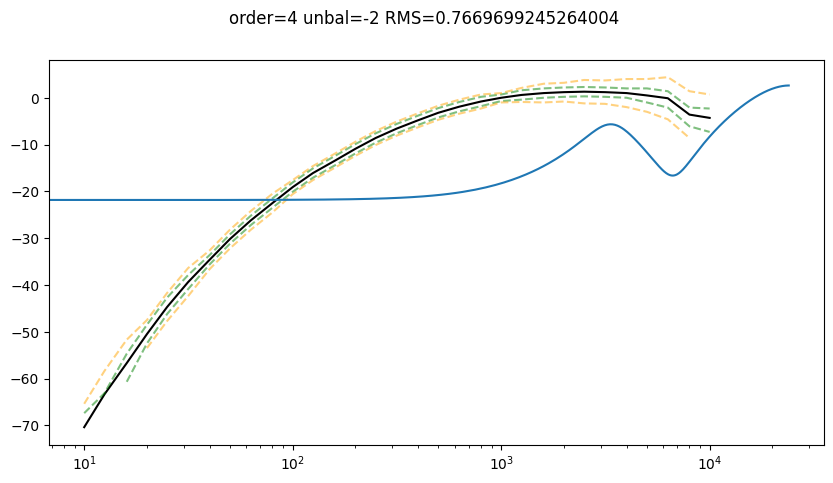

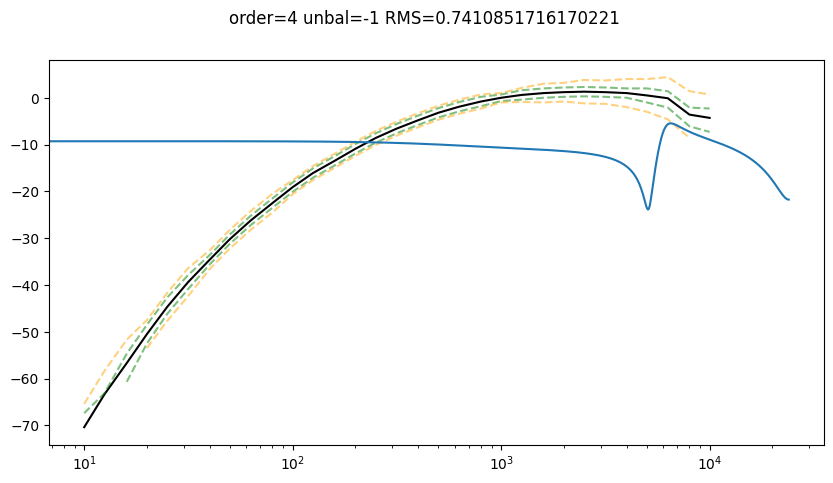

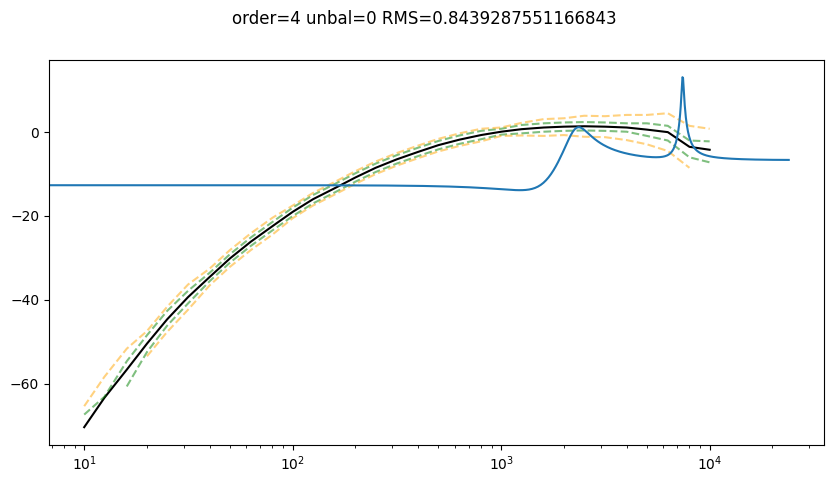

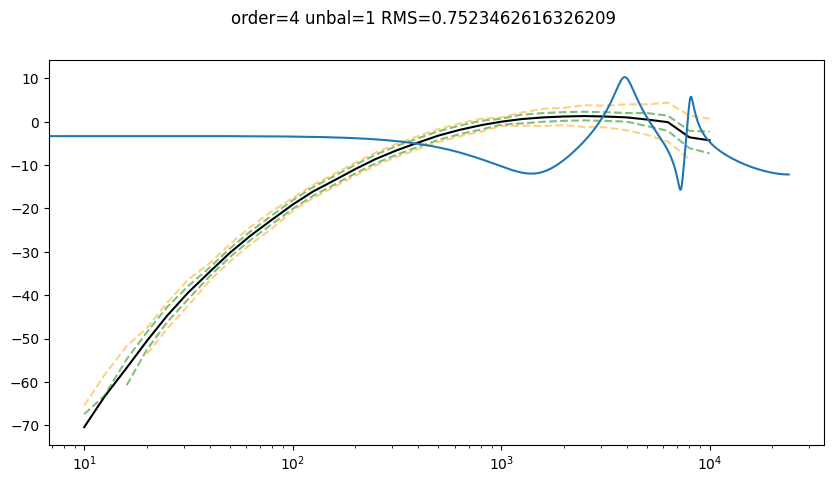

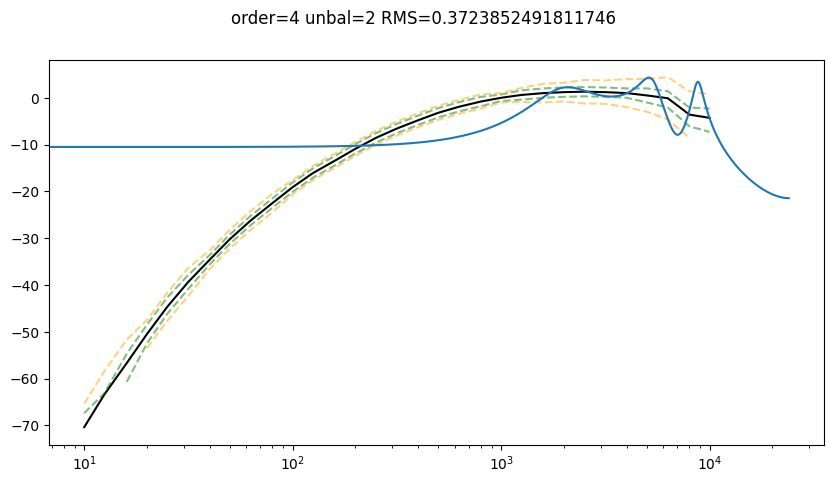

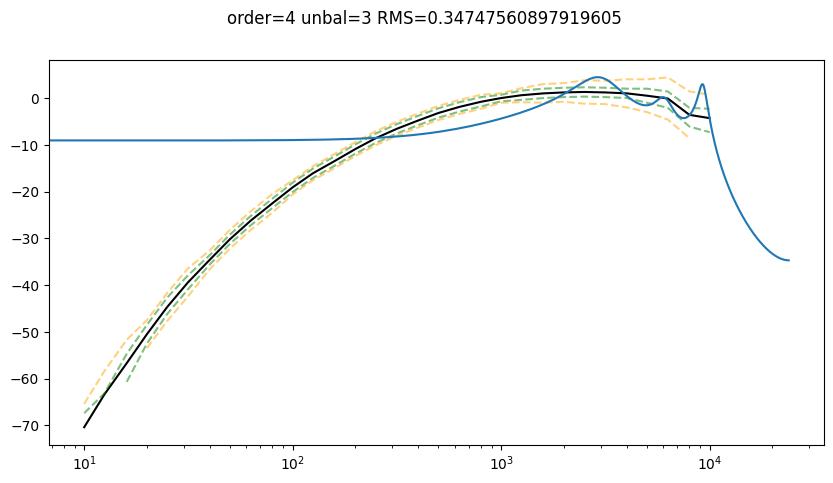

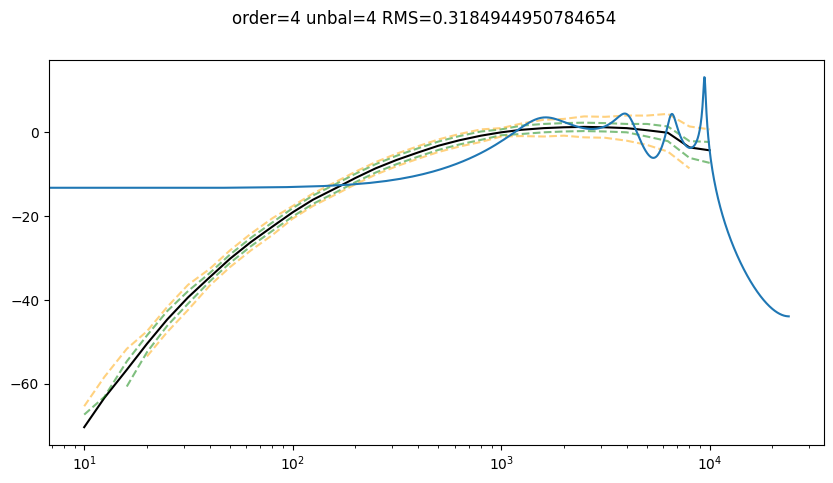

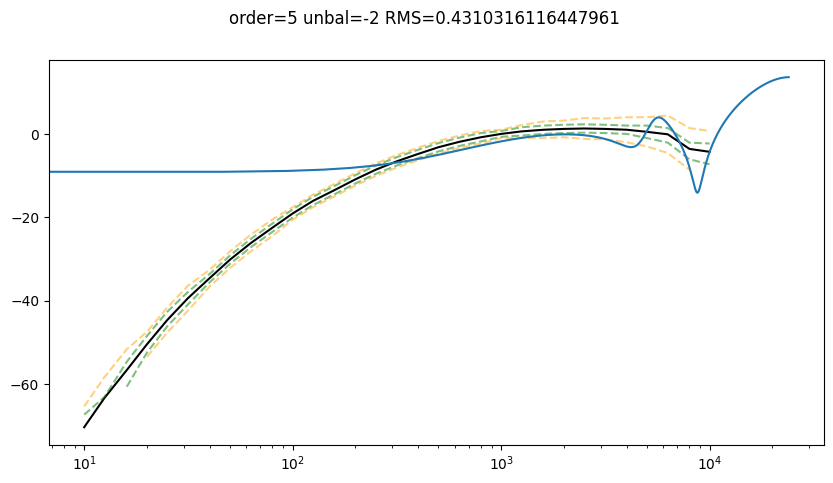

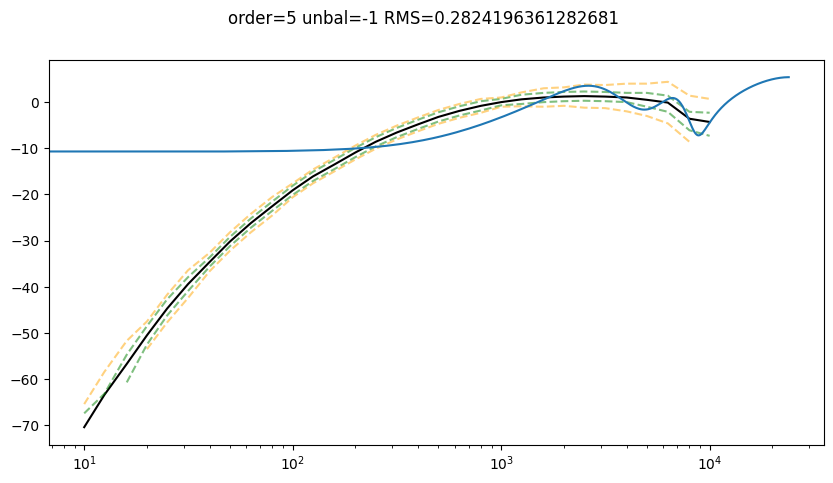

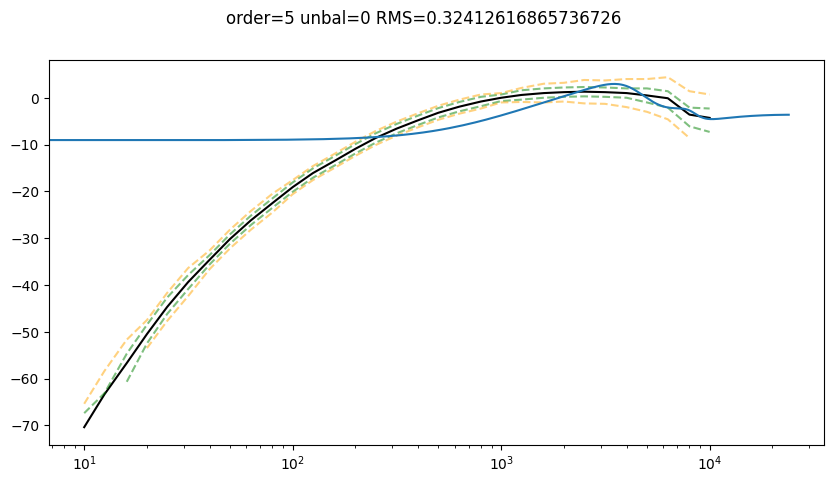

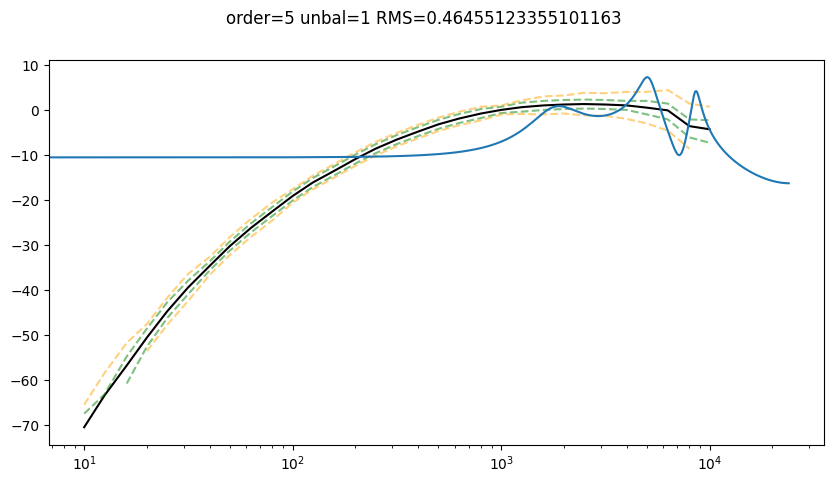

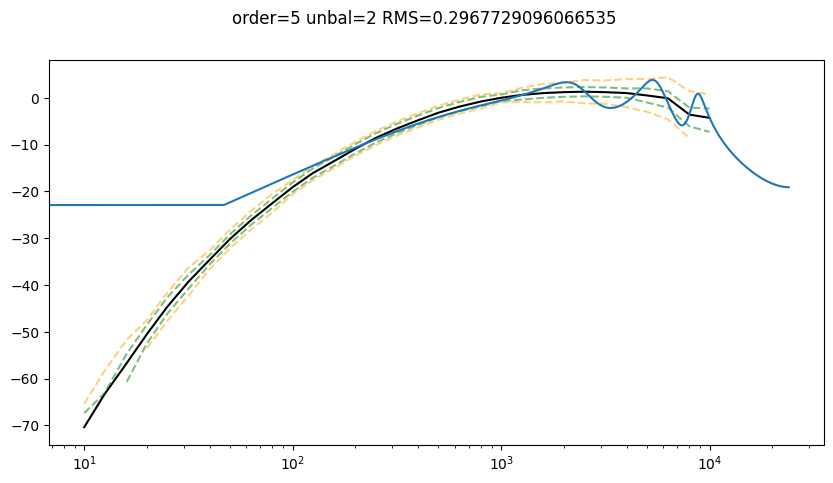

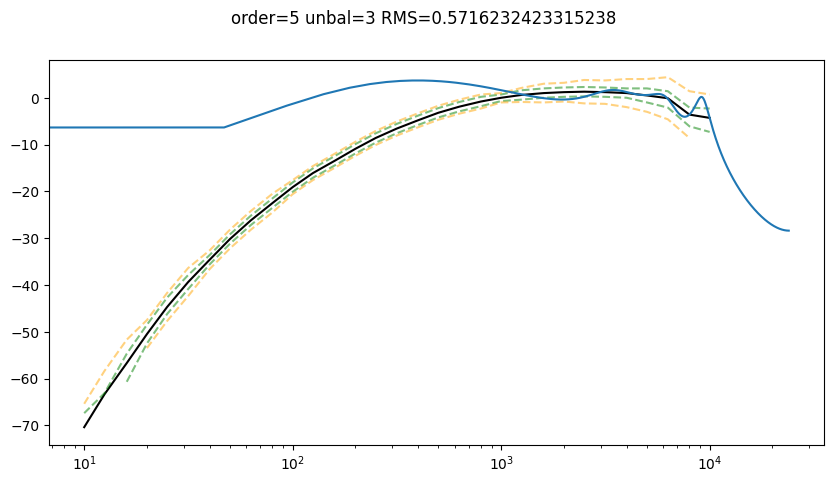

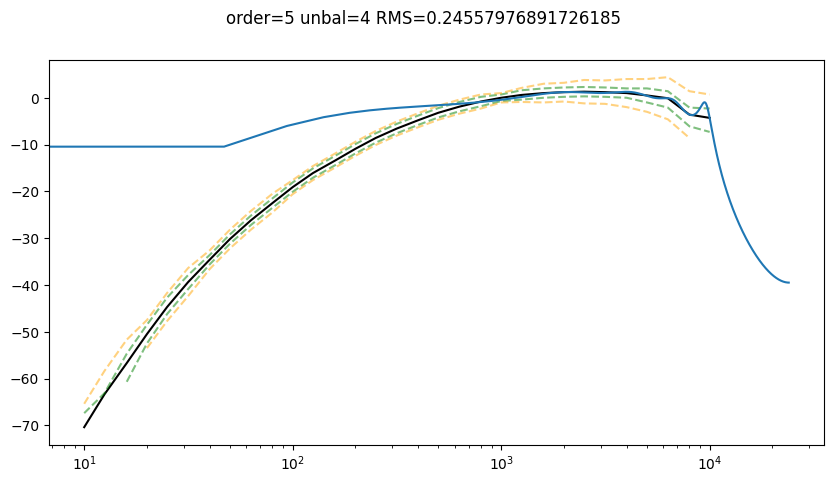

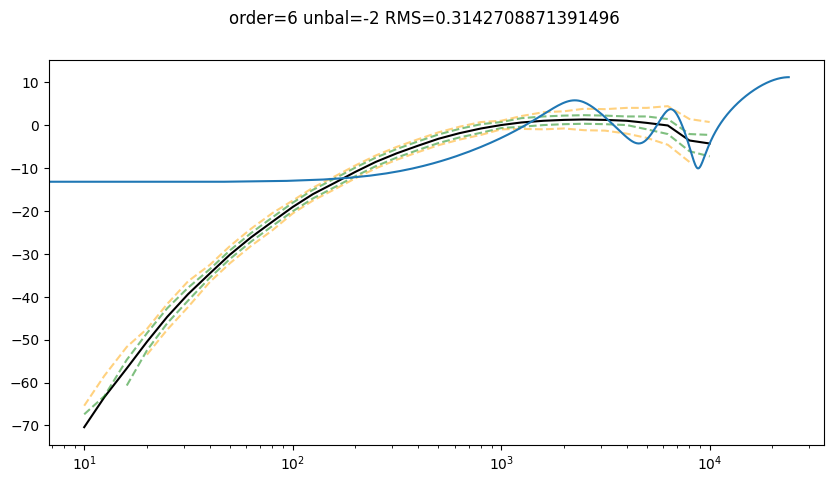

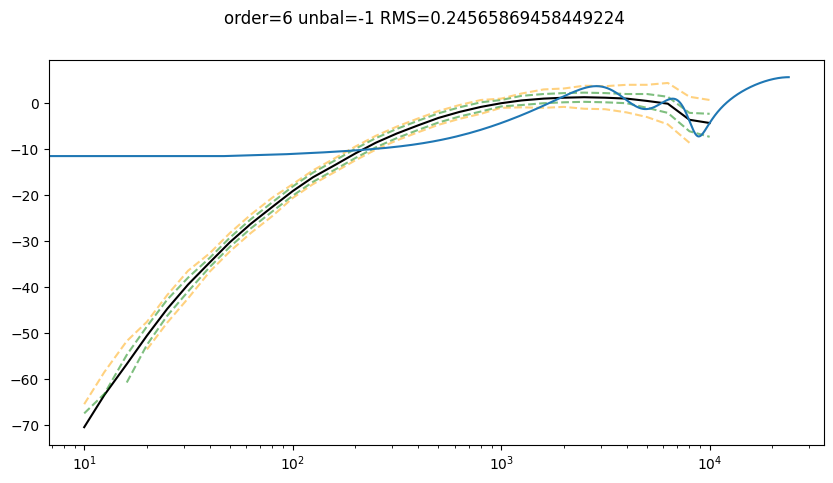

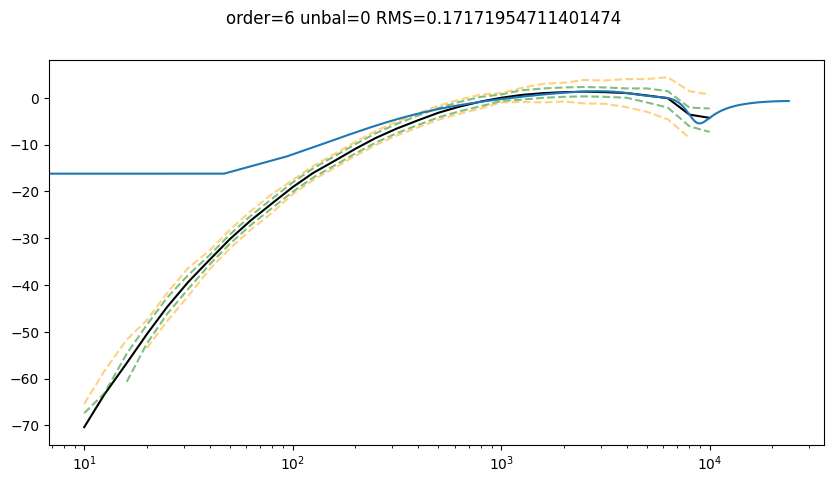

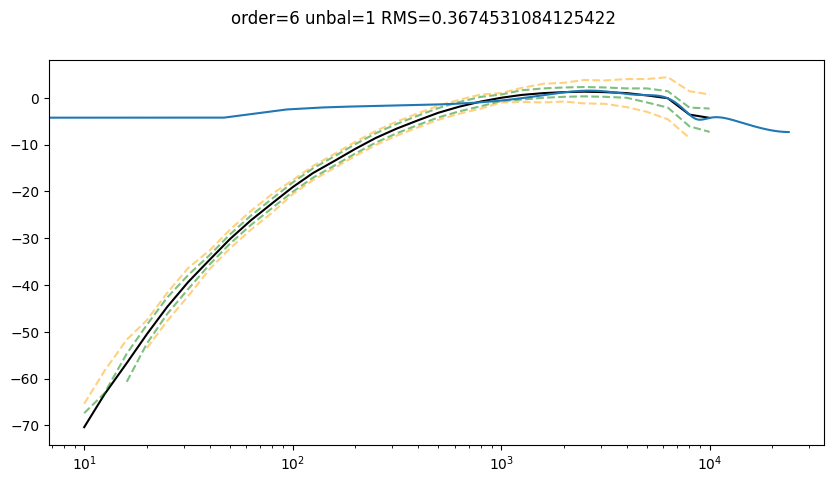

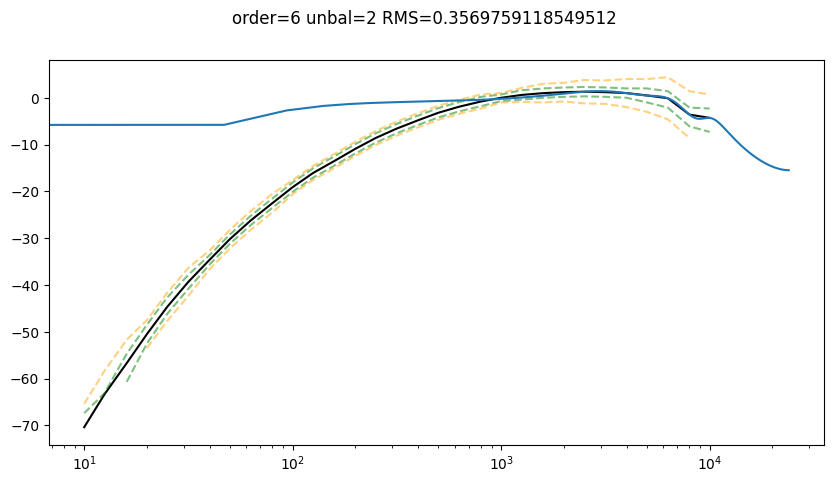

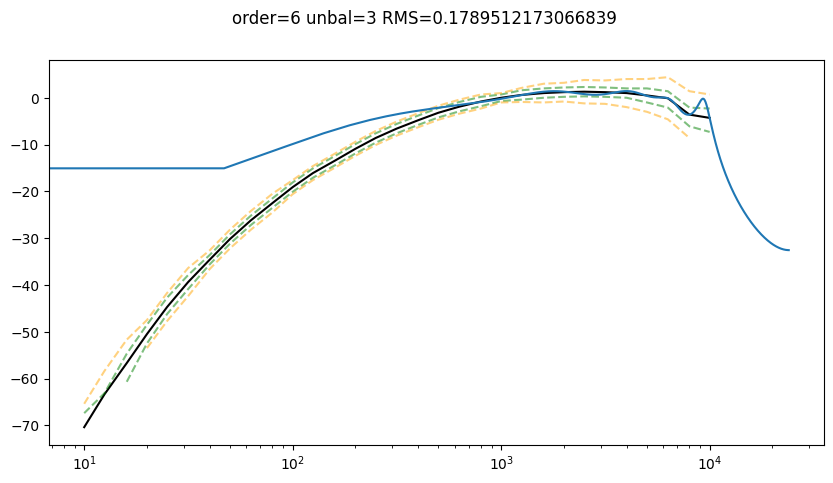

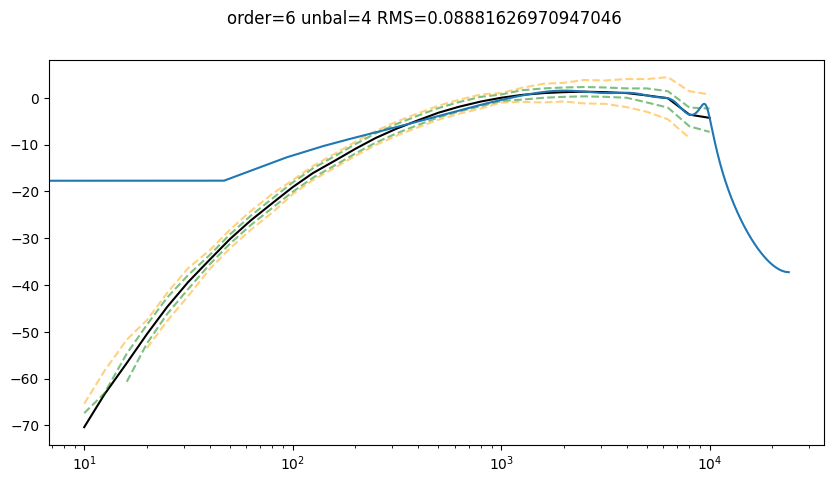

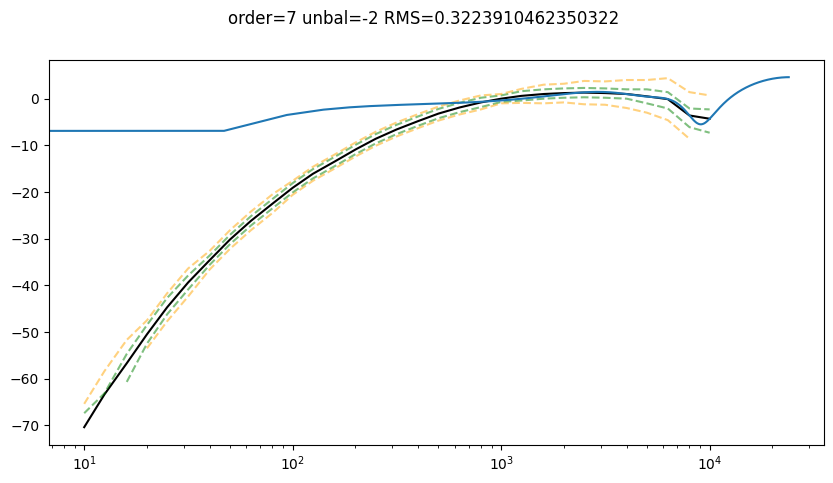

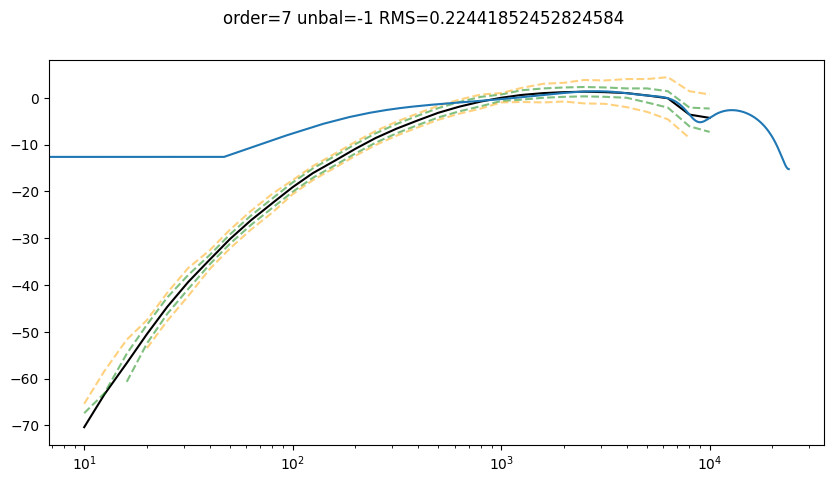

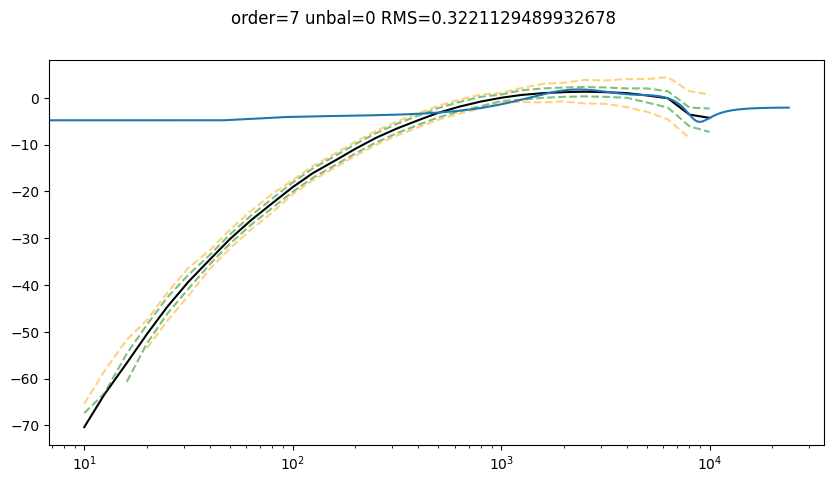

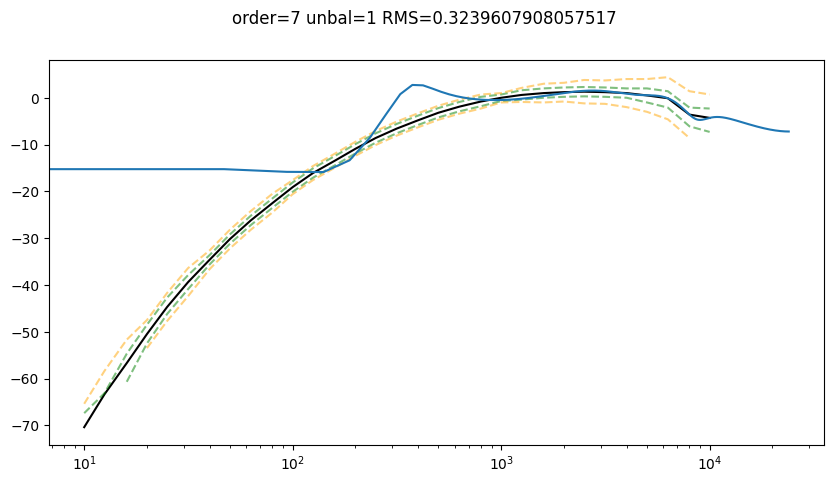

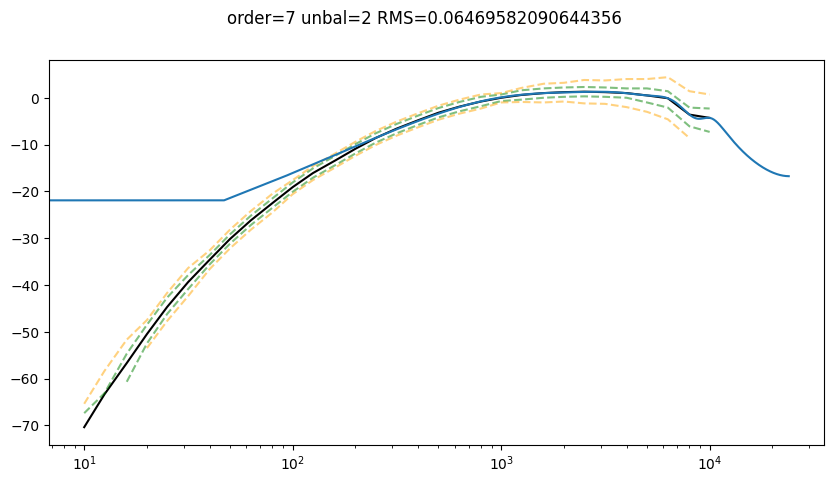

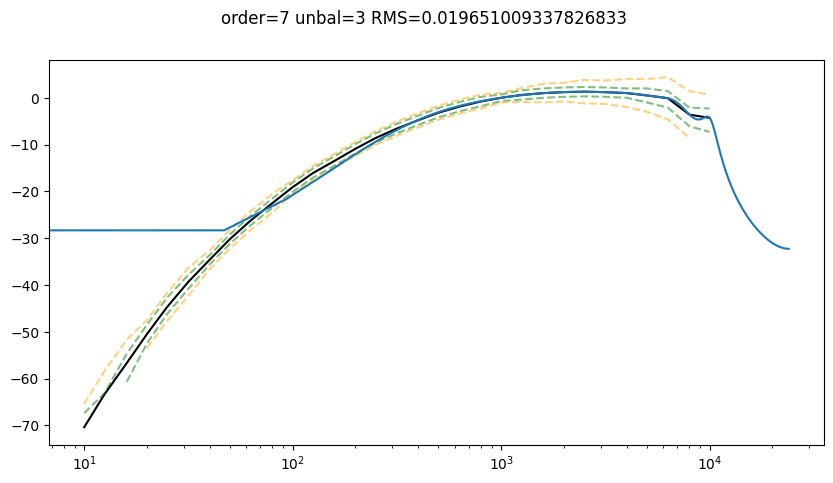

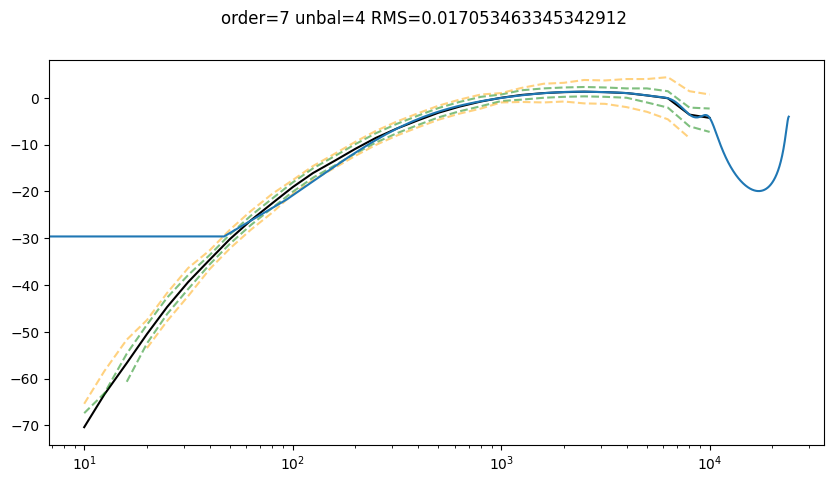

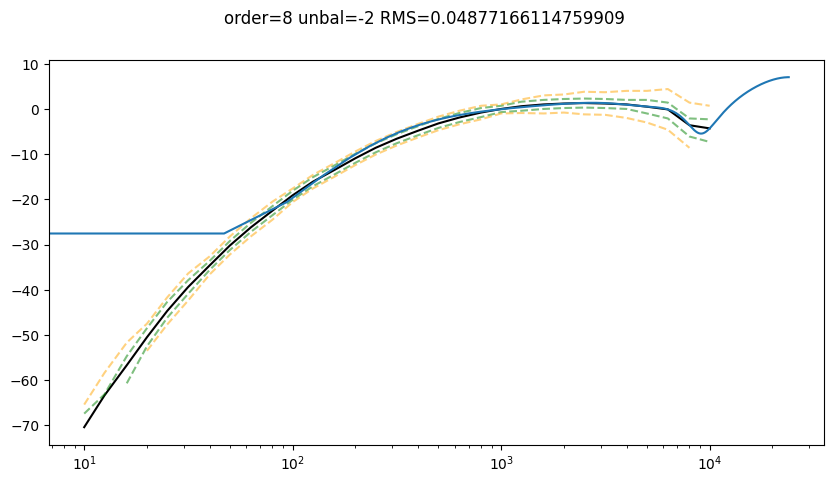

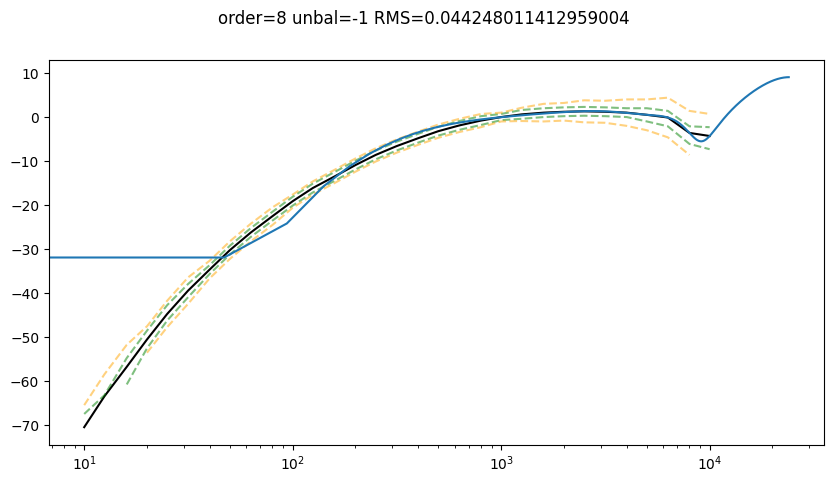

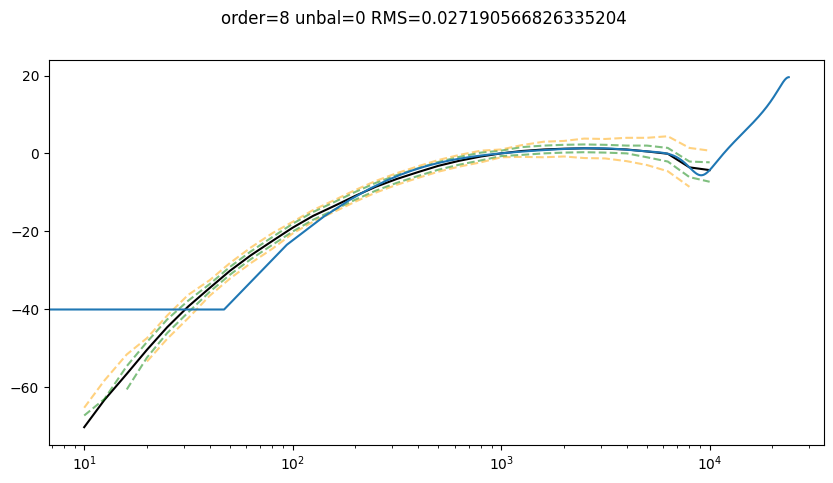

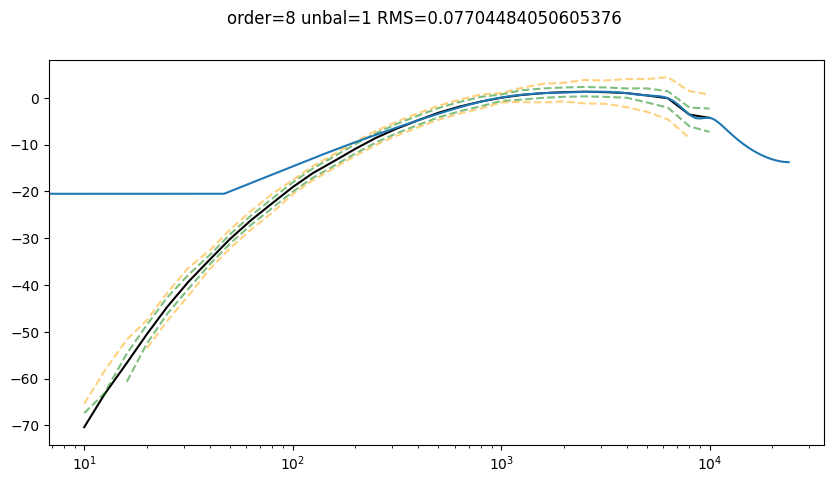

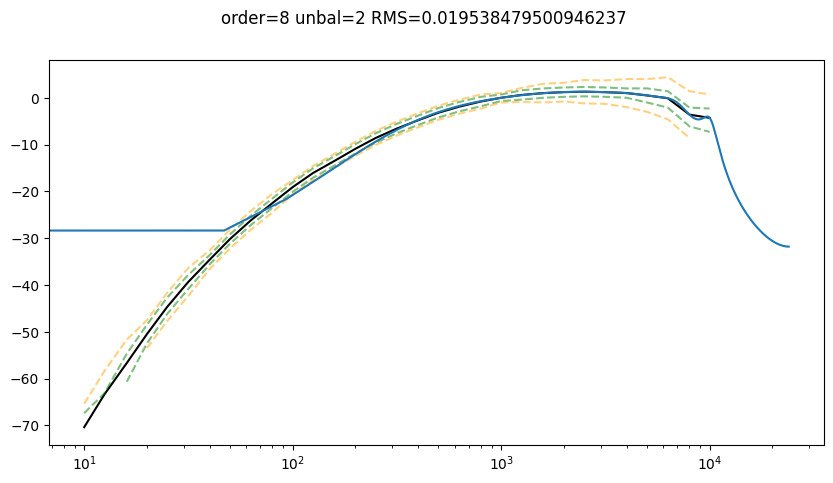

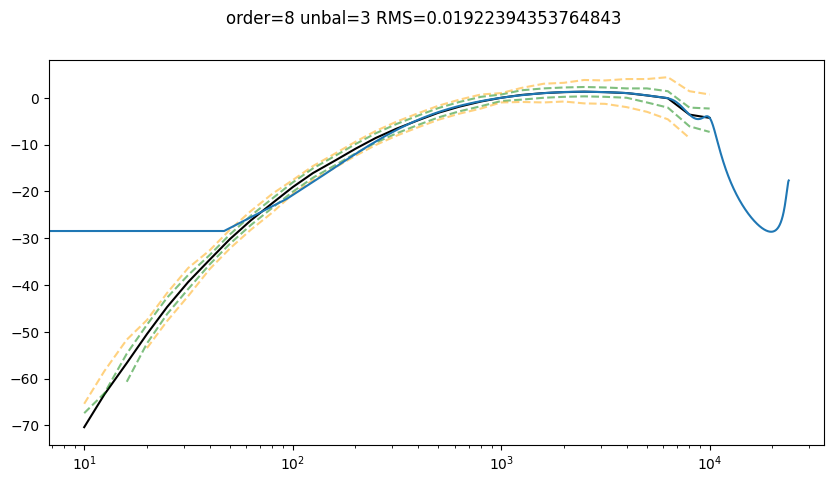

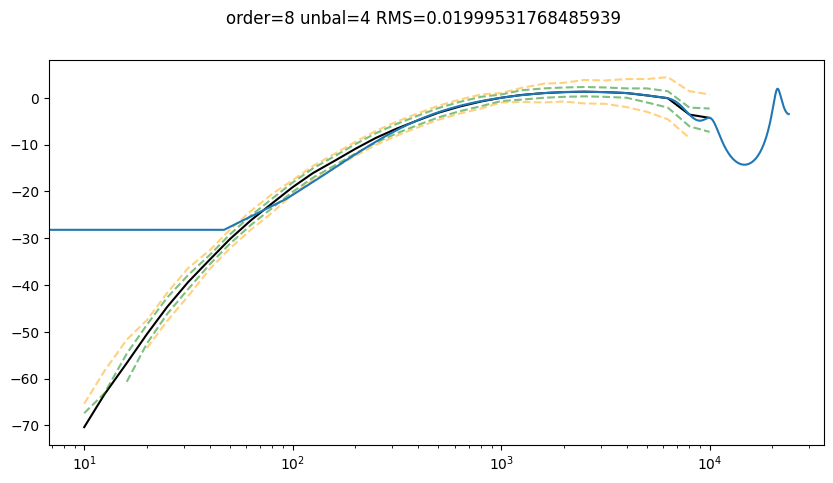

In [61]:

# 
# https://pydynamic.readthedocs.io/en/latest/PyDynamic.model_estimation.html#module-PyDynamic.model_estimation.fit_filter

from PyDynamic.model_estimation.fit_filter import LSIIR


def db_to_magnitude(db : numpy.array):
    return 10 ** (db / 20.0)


def fit_iir(specs, order=4, unbalance=0, stabilize=0, fs = 48000, delay=0):

    #specs = specs.loc[100:10000]
    specs = specs.loc[10:10000]
    
    H = numpy.array(db_to_magnitude(specs.target), dtype=complex)
    #H = numpy.array(specs.target, dtype=complex)
    max_iter = stabilize
    delay_initial = delay

    b, a, tau, _, rms = LSIIR(H=H, Nb=order, Na=order+unbalance, f=numpy.array(specs.index),
                              Fs=fs, tau=delay_initial, verbose=True, return_rms=True,
                              max_stab_iter=max_iter, inv=False)

    print(order, rms)

    w, h = scipy.signal.freqz(b, a, fs=fs)
    h_db = 20 * numpy.log10(numpy.abs(h))

    fig, ax = plt.subplots(1, figsize=(10, 5))
    plot_weighting(ax, specs)
    ax.plot(w, h_db, label='filt')
    fig.suptitle(f'order={order} unbal={unbalance} RMS={rms}')

for order in range(4, 9):
    for unbalance in range(-2, +5):
        fit_iir(specs, order=order, unbalance=unbalance, stabilize=1, delay=10)



In [ ]:

# TODO: try scilab iirlp
# https://help.scilab.org/iirlp





In [2]:

import torch

class TorchIIR(torch.autograd.Function):
    """
    IIR filter as a torch.autograd.Function.

    Ref: https://intro2ddsp.github.io/filters/iir_torch.html
    """
    @staticmethod
    def forward(ctx, x: torch.Tensor, a: torch.Tensor):
        assert x.ndim == 1
        assert a.ndim == 1
        M = a.numel()

        assert x.is_cpu & a.is_cpu, "Sorry, CPU only for now :("

        a_scipy = [1] + a.numpy().tolist()
        y_scipy = signal.lfilter([1] + [0] * M, a_scipy, x.numpy())
        y = torch.from_numpy(y_scipy).to(x.dtype)

        # remember to save necessary tensors for backward pass
        ctx.save_for_backward(a, y)
        return y

    @staticmethod
    def backward(ctx, y_grad: torch.Tensor):
        a, y = ctx.saved_tensors
        M = a.numel()
        T = y.numel()

        # compute gradient wrt a
        shift_y = torch.cat([y.new_zeros(M), y[:-1]])
        dyda = TorchIIR.apply(-shift_y, a).unfold(0, T, 1).flip(0)
        a_grad = dyda @ y_grad

        # compute gradient wrt x
        x_grad = TorchIIR.apply(y_grad.flip(0), a).flip(0)
        return x_grad, a_grad

@torch.jit.script
def freq_iir(x: torch.Tensor, a: torch.Tensor):
    """
    Frequency sampling of IIR filter.
    """
    assert x.ndim == 1
    assert a.ndim == 1
    T = x.numel()
    M = a.numel()

    X = torch.fft.rfft(x)
    A = torch.fft.rfft(torch.cat([a.new_ones(1), a]), n=T)
    mag = torch.abs(A)
    phase = torch.angle(A)
    H = torch.nan_to_num(mag.reciprocal()) * torch.exp(-1j * phase)
    Y = X * H
    y = torch.fft.irfft(Y)
    return y

def test_iir_gradcheck():

    assert torch.autograd.gradcheck(IIR.apply, (test_signal_torch_params[:1000], a_torch_params))
    assert torch.autograd.gradgradcheck(IIR.apply, (test_signal_torch_params[:1000], a_torch_params), atol=1e-4)

# TODO: create a nn.Module for a learnable IIR filter
# use nn.Parameter for the filter weights
# but probably it should use lfilter from torchaudio? https://pytorch.org/audio/stable/generated/torchaudio.functional.lfilter.html

def fit_iir_frequency_response():

    F = torch.nn.functional
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    target
    
    losses = []
    for _ in range(2000):
        optimizer.zero_grad()
        output = model(1024)
        loss = F.l1_loss(output, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    
    plt.plot(losses)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()


In [ ]:


# IIR filter optimization in JAX
# https://bartwronski.com/2022/09/05/gradient-descent-optimized-recursive-filters-for-deconvolution-deblurring/
